In [6]:
from matplotlib import pyplot as matplot
import numpy as numpy
import cv2
import os
import math
from math import sqrt,log
from cmath import sqrt

In [17]:
os.chdir("C:\Siddhartha\Confidential Documents\Stretch Projects\Data Science\Signature Verification\Testing")

In [8]:
img = cv2.imread("001_4.PNG",0)

In [9]:
matplot.imshow(img)

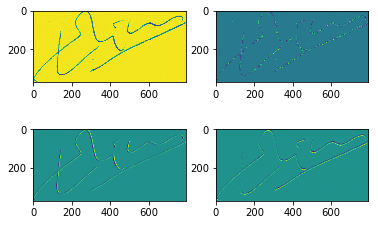

In [10]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
matplot.subplot(2,2,1),matplot.imshow(img)
matplot.subplot(2,2,2),matplot.imshow(laplacian)
matplot.subplot(2,2,3),matplot.imshow(sobelx)
matplot.subplot(2,2,4),matplot.imshow(sobely)
 
matplot.show()

In [11]:
laplacian = cv2.Laplacian(img, cv2.CV_8U)
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)

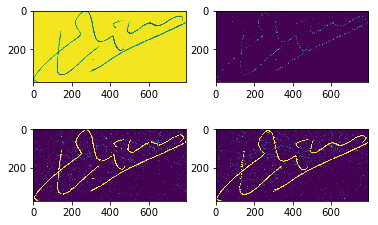

In [12]:
matplot.subplot(2,2,1),matplot.imshow(img)
matplot.subplot(2,2,2),matplot.imshow(laplacian)
matplot.subplot(2,2,3),matplot.imshow(sobelx)
matplot.subplot(2,2,4),matplot.imshow(sobely)
 
matplot.show()

In [18]:
kernel = numpy.ones((2,2), numpy.uint8)
img_dilation = cv2.dilate(img, kernel, iterations=2)
img_erosion = cv2.erode(img, kernel, iterations=4)

edges = cv2.Canny(img_erosion,cv2.THRESH_BINARY+cv2.THRESH_OTSU,550,apertureSize = 3)
#edges = cv2.Canny(gray,1,250,apertureSize = 3)

minLineLength=100
maxLineGap=10
threshold=20

image=edges

lines = cv2.HoughLinesP(image=img,rho=1,theta=numpy.pi/180, threshold=threshold,lines=numpy.array([]), minLineLength=minLineLength,maxLineGap=maxLineGap)

angles = []
Len = []
Rho = []
for x1,y1,x2,y2 in lines[0]:
    theta = math.atan(float(y2 - y1) / (x2 - x1))
    Leng = sqrt((x2-x1)^2 + (y2-y1)^2)
    Rho = (x1 * y2 - x2 * y1) / Leng
    angles.append({'theta': theta, 'p1': (x1, y1), 'p2': (x2, y2)})

for i in range(len(angles)):
    for j in range(i + 1, len(angles)):
        delta = abs(angles[i]['theta'] - angles[j]['theta'])
        if delta < 0.01:
            print(delta)#, angles[i], angles[j])
            cv2.line(base, angles[i]['p1'], angles[i]['p2'], (0, 0, 255), 2, cv2.CV_AA)
            cv2.line(base, angles[j]['p1'], angles[j]['p2'], (255, 0, 0), 2, cv2.CV_AA)






a,b,c = lines.shape
#for i in range(a):
#    cv2.line(base, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 13, cv2.CV_AA)

cv2.imwrite("002_2_14.png",img)
cv2.imwrite("002_3_14.png",edges)
Leng
Rho

8307.20368833105j

In [19]:
print(a,b,c,round(theta,4),round(abs(Rho),0),round(abs(Leng),0))

424 1 4 -0.0517 8307.0 29.0


In [23]:
lines.grey()

AttributeError: 'numpy.ndarray' object has no attribute 'grey'

In [47]:
angles

[{'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625}]

In [45]:
leng_rho(img)

0.0


AttributeError: module 'cv2.cv2' has no attribute 'CV_AA'

In [38]:
len(angles)

8

In [39]:
angles

[{'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625},
 {'p1': (0, 302), 'p2': (792, 261), 'theta': -0.051721507049110625}]

In [42]:
abs(angles[2]['theta'])

0.051721507049110625

In [43]:
abs(angles[1]['theta'])

0.051721507049110625

In [46]:
lines

array([[[  0, 302, 792, 261]],

       [[  0, 361, 792, 333]],

       [[  0, 172, 792, 370]],

       ...,

       [[  0, 351, 722, 301]],

       [[  0, 161, 243, 169]],

       [[  2,  53, 792, 164]]], dtype=int32)